- <https://huhuhang.com/post/machine-learning/seaborn-basic>
- <https://hg95.github.io/matplotlib_seaborn/Chapter7/Seaborn%20简介.html>

In [15]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

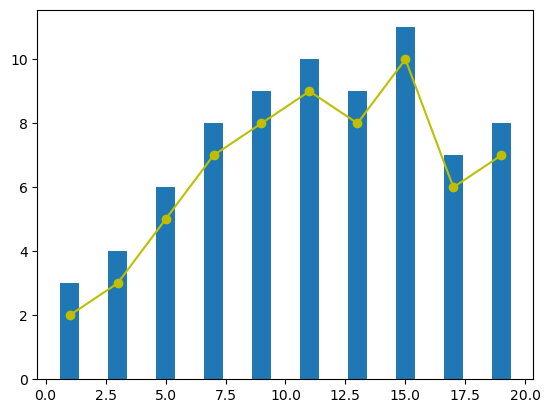

In [17]:
x = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
y_bar = [3, 4, 6, 8, 9, 10, 9, 11, 7, 8]
y_line = [2, 3, 5, 7, 8, 9, 8, 10, 6, 7]
plt.bar(x, y_bar)
plt.plot(x, y_line, '-o', color='y')

In [8]:
sns.set(context='paper', style='ticks')  # 声明使用 Seaborn 样式

```python
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
```
- context='' 参数控制着默认的画幅大小，分别有 {paper, notebook, talk, poster} 四个值。其中，poster > talk > notebook > paper。
- style='' 参数控制默认样式，分别有 {darkgrid, whitegrid, dark, white, ticks}，你可以自行更改查看它们之间的不同。
- palette='' 参数为预设的调色板。分别有 {deep, muted, bright, pastel, dark, colorblind} 等，你可以自行更改查看它们之间的不同。
  - bright: 高对比度
  - pastel: 变浅色
- 剩下的 font='' 用于设置字体，font_scale= 设置字体大小，color_codes= 不使用调色板而采用先前的 'r' 等色彩缩写。

## 数据

```python
tips = sns.load_dataset('tips')
```


## 关联图

- `replot` 是 figure level 的接口

In [9]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


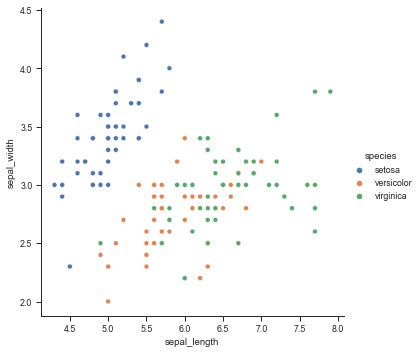

In [10]:
sns.relplot(x="sepal_length", y="sepal_width", hue="species", data=iris)  # hue 着色
# sns.despine(top=False,right=False)
plt.show()

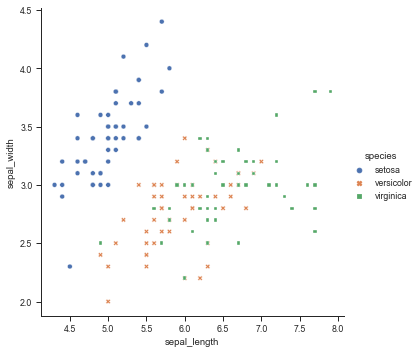

In [11]:

sns.relplot(x="sepal_length", y="sepal_width",
            hue="species", style="species", data=iris)  # 图例说明是形状

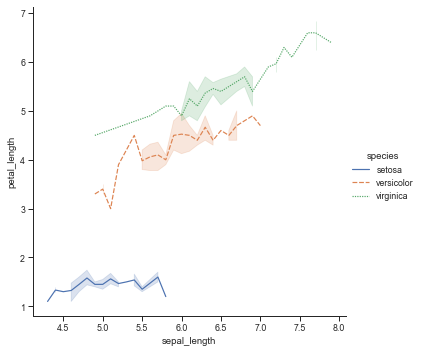

In [12]:
"""线性图,自带 95% 置信区间"""
sns.relplot(x="sepal_length", y="petal_length",
            hue="species", style="species", kind="line", data=iris)

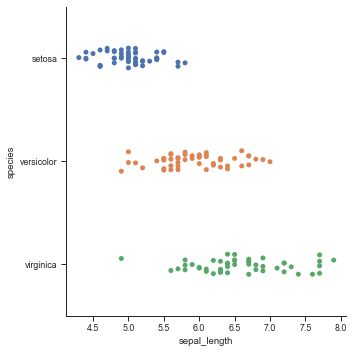

In [13]:
"""类别图"""
sns.catplot(x="sepal_length", y="species", data=iris)

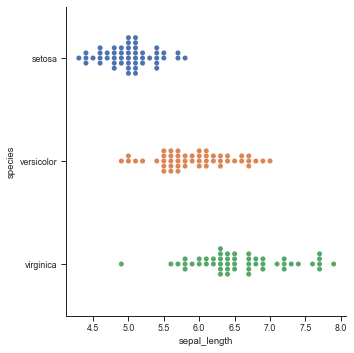

In [14]:
"""kind="swarm" 可以让散点按照 beeswarm 的方式防止重叠，可以更好地观测数据分布。"""
sns.catplot(x="sepal_length", y="species", kind="swarm", data=iris)

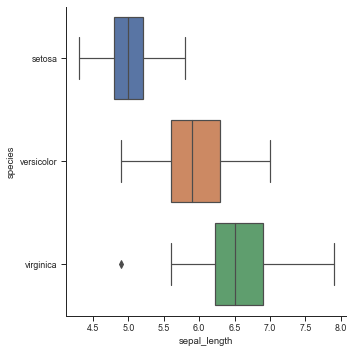

In [15]:
"""绘制箱线图"""
sns.catplot(x="sepal_length", y="species", kind="box", data=iris)

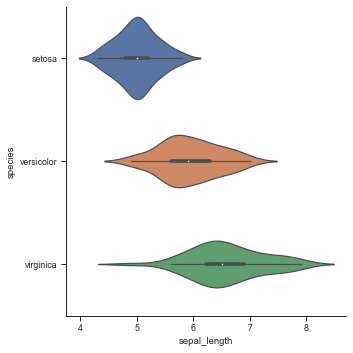

In [16]:
"""小提琴图"""
sns.catplot(x="sepal_length", y="species", kind="violin", data=iris)

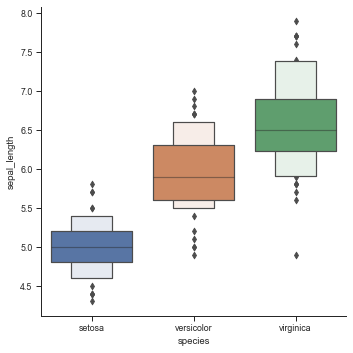

In [17]:
"""增强箱线图"""
sns.catplot(x="species", y="sepal_length", kind="boxen", data=iris)

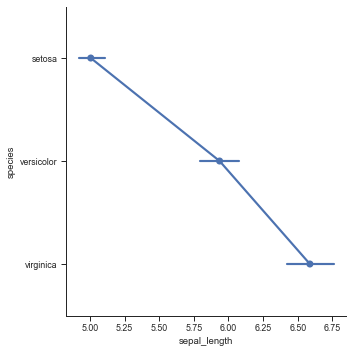

In [18]:
"""绘制点线图"""
sns.catplot(x="sepal_length", y="species", kind="point", data=iris)

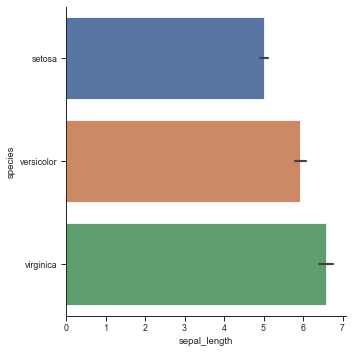

In [19]:
"""条形图"""
sns.catplot(x="sepal_length", y="species", kind="bar", data=iris)

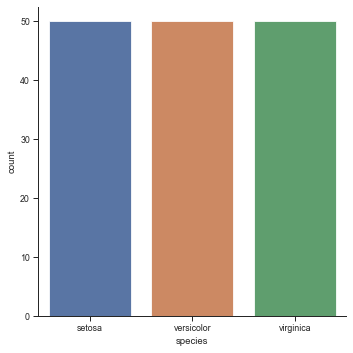

In [20]:
"""计数条形图"""
sns.catplot(x="species", kind="count", data=iris)

## 分布图

/home/seeyou/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

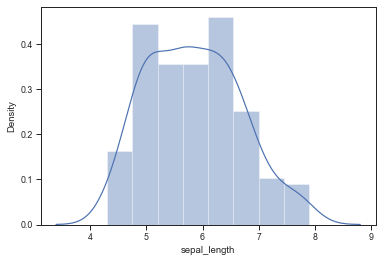

In [21]:
sns.distplot(iris["sepal_length"])  # 快速查看单变量分布

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

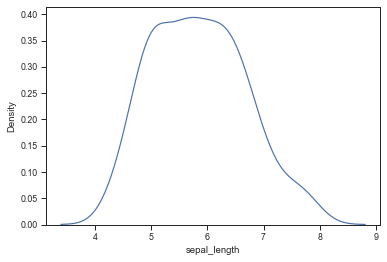

In [22]:
sns.kdeplot(iris["sepal_length"])  # 核密度估计图

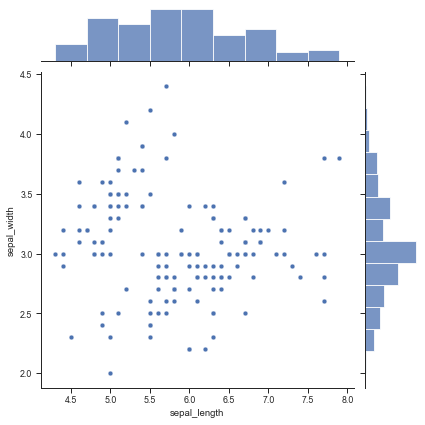

In [23]:
"""二元变量分布图"""
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)

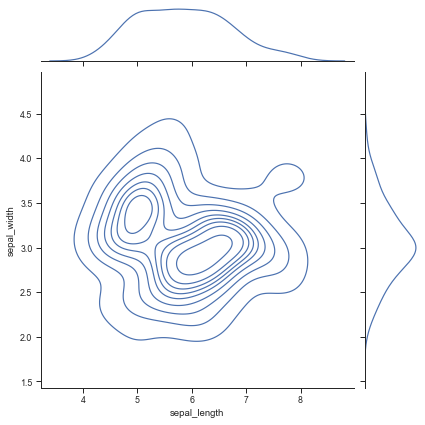

In [24]:
"""支持 kind= 参数指定绘制出不同样式的分布图。"""
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")

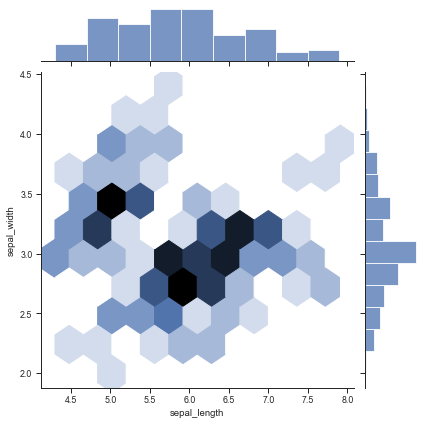

In [25]:
"""六边形计数图"""
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="hex")

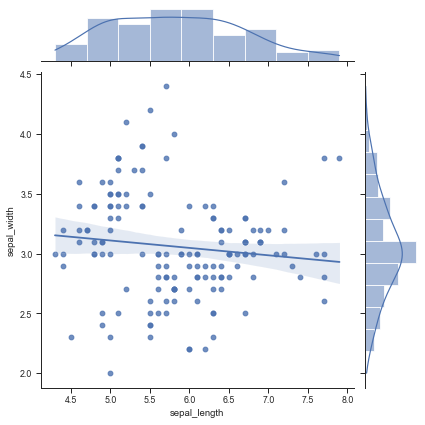

In [26]:
"""回归拟合图"""
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="reg")

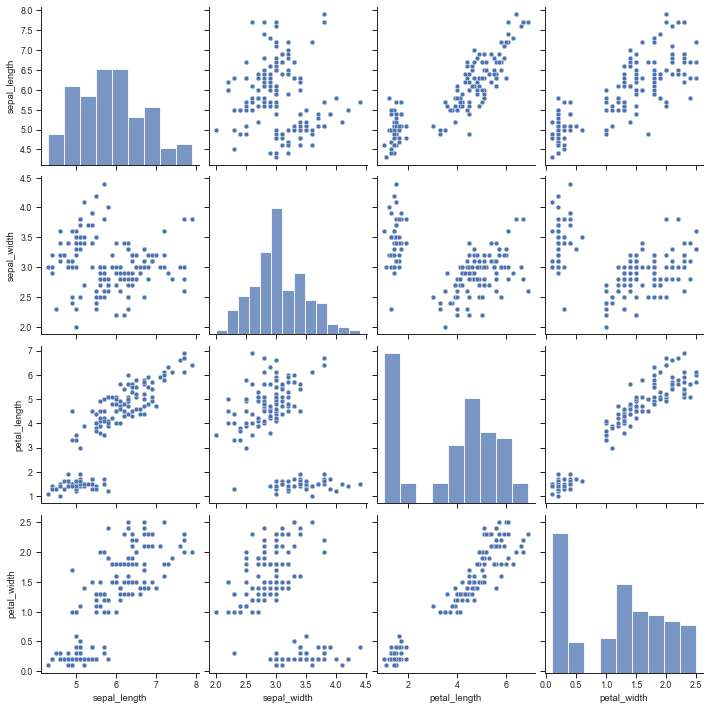

In [27]:
""""特征变量两两对比绘图"""
sns.pairplot(iris)

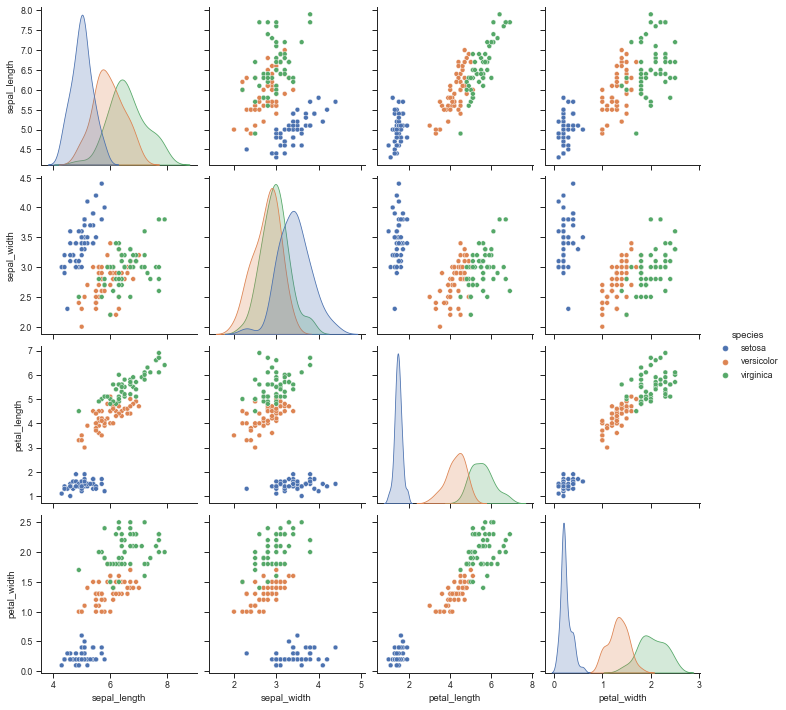

In [28]:
""""特征变量两两对比绘图 加入色别"""
sns.pairplot(iris, hue="species")

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

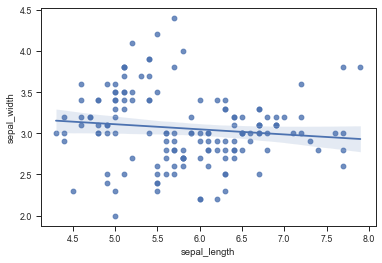

In [29]:
"""自动完成线性回归"""
sns.regplot(x="sepal_length", y="sepal_width", data=iris)

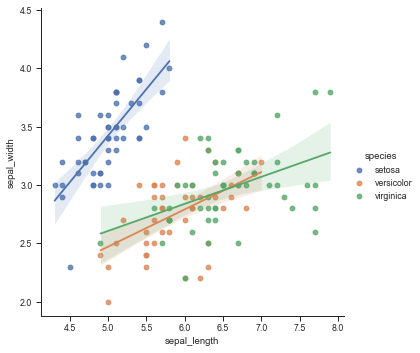

In [30]:
"""自动完成多变量线性回归"""
sns.lmplot(x="sepal_length", y="sepal_width", hue="species", data=iris)

## 矩阵图

<AxesSubplot:>

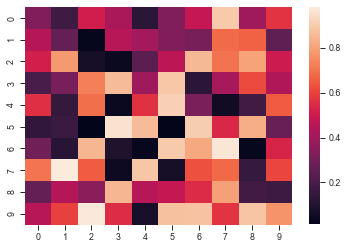

In [31]:
import numpy as np
sns.heatmap(np.random.rand(10, 10))

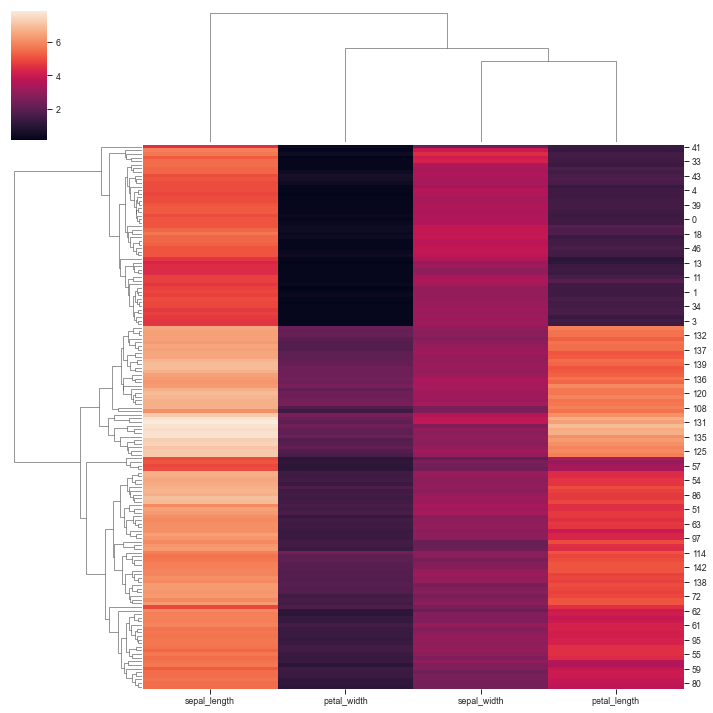

In [32]:
"""层次聚类图"""
iris.pop("species")
sns.clustermap(iris)

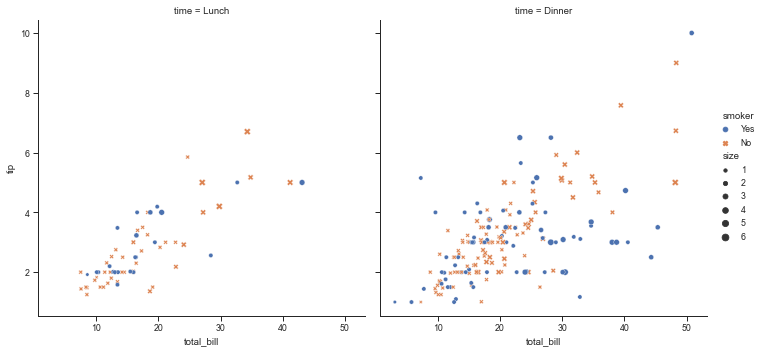

In [33]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips)  # 两列

In [34]:
sns.color_palette("Blues",8)

[(0.8825067281814687, 0.929196462898885, 0.9724413687043445),
 (0.7993540945790081, 0.8740792003075739, 0.944882737408689),
 (0.6718954248366014, 0.8143790849673203, 0.9006535947712418),
 (0.5105882352941177, 0.7323029603998462, 0.8588389081122645),
 (0.34646674356016915, 0.632402921953095, 0.8106728181468666),
 (0.21568627450980393, 0.5294117647058824, 0.7542483660130719),
 (0.10557477893118032, 0.41262591311034214, 0.6859669357939254),
 (0.03137254901960784, 0.301914648212226, 0.588404459823145)]

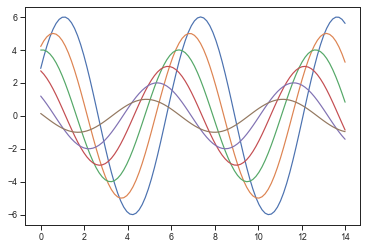

In [35]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)


sinplot()
plt.show()

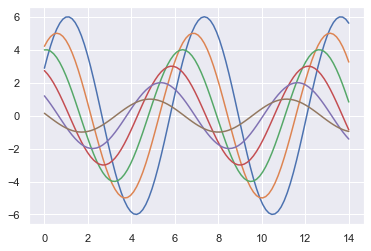

In [36]:
sns.set()
sinplot()
plt.show()

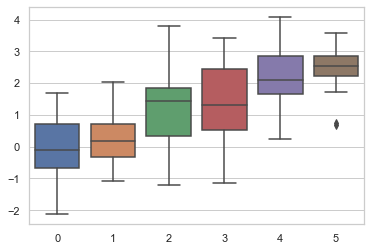

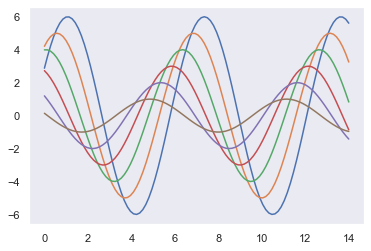

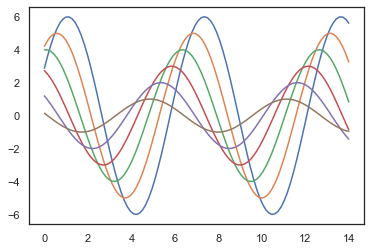

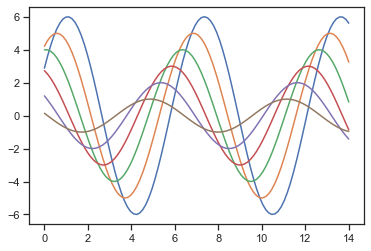

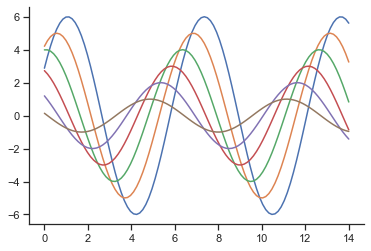

In [37]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)
plt.show()

sns.set_style("dark")
sinplot()
plt.show()

sns.set_style("white")
sinplot()
plt.show()

sns.set_style("ticks")
sinplot()
plt.show()

sinplot()
sns.despine()
plt.show()

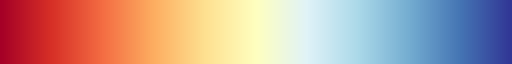

In [7]:
plt.cm.get_cmap('RdYlBu')

In [12]:
sns.color_palette(plt.cm.Set3(np.linspace(0, 1, 12)))

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [13]:
sns.color_palette(plt.cm.magma(np.linspace(0, 1, 15)))

[(0.001462, 0.000466, 0.013866),
 (0.048062, 0.036607, 0.150327),
 (0.135053, 0.068391, 0.315),
 (0.25222, 0.059415, 0.453248),
 (0.372116, 0.092816, 0.499053),
 (0.481929, 0.136891, 0.507989),
 (0.594508, 0.175701, 0.501241),
 (0.716387, 0.214982, 0.47529),
 (0.828886, 0.262229, 0.430644),
 (0.921884, 0.341098, 0.377376),
 (0.973381, 0.46152, 0.361965),
 (0.993326, 0.602275, 0.41439),
 (0.997341, 0.733545, 0.505167),
 (0.993545, 0.862859, 0.619299),
 (0.987053, 0.991438, 0.749504)]